In [100]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn import metrics
from sklearn.metrics import r2_score

In [78]:
df = pd.read_csv('uber.csv')
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [79]:
df.shape

(200000, 9)

In [80]:
df = df.iloc[:, 1:]

In [81]:
df.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [82]:
df = df.drop("key",axis=1)

In [83]:
df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [84]:
df.isnull().sum()

fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [85]:
df = df.dropna(subset=['dropoff_longitude','dropoff_latitude'])

In [86]:
def remove_outliers(df, col):
    if pd.api.types.is_numeric_dtype(df[col]):  # Check if the column is numeric
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lowerBound = Q1 - 1.5 * IQR
        upperBound = Q3 + 1.5 * IQR
        df[col] = np.clip(df[col], lowerBound, upperBound)
    return df

## passing all columns one by one to above function
def all_col(df, col_list):
    for col in col_list:
        df = remove_outliers(df, col)
    return df

In [87]:
col_list = df.columns
df = all_col(df,col_list)

fare_amount             Axes(0.125,0.786098;0.352273x0.0939024)
pickup_longitude     Axes(0.547727,0.786098;0.352273x0.0939024)
pickup_latitude         Axes(0.125,0.673415;0.352273x0.0939024)
dropoff_longitude    Axes(0.547727,0.673415;0.352273x0.0939024)
dropoff_latitude        Axes(0.125,0.560732;0.352273x0.0939024)
passenger_count      Axes(0.547727,0.560732;0.352273x0.0939024)
dtype: object

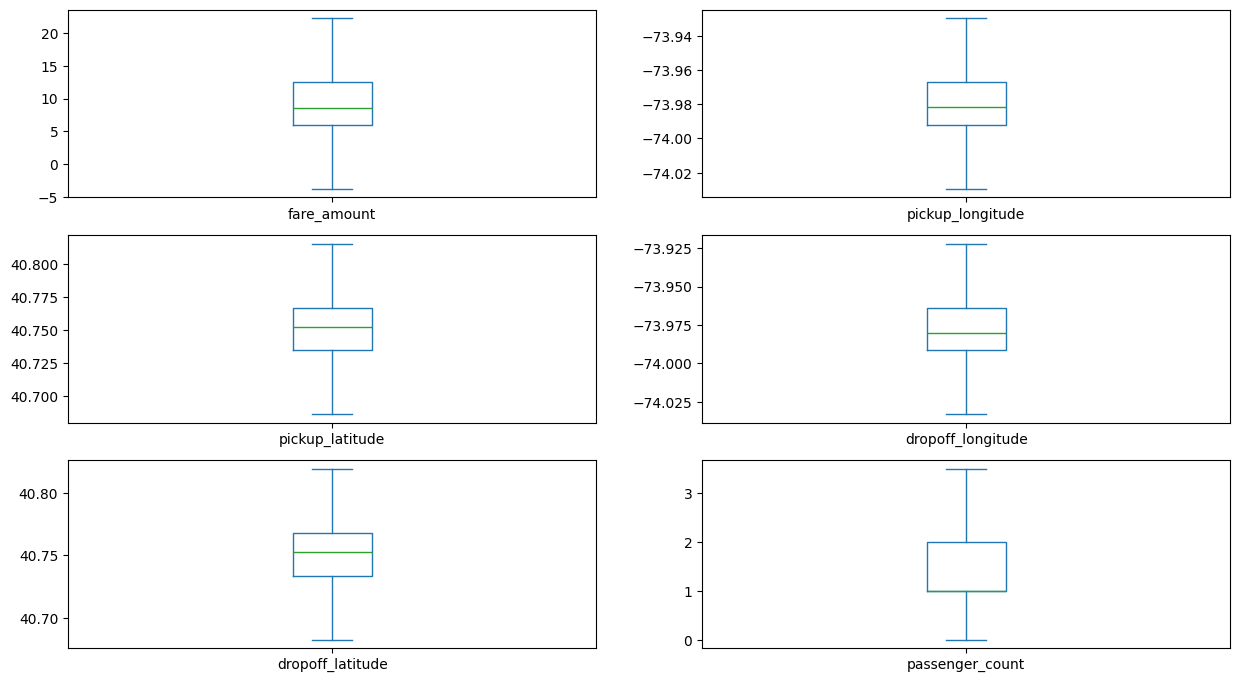

In [88]:
df.plot(kind='box',subplots=True,layout=(7,2),figsize=(15,20))

<Axes: >

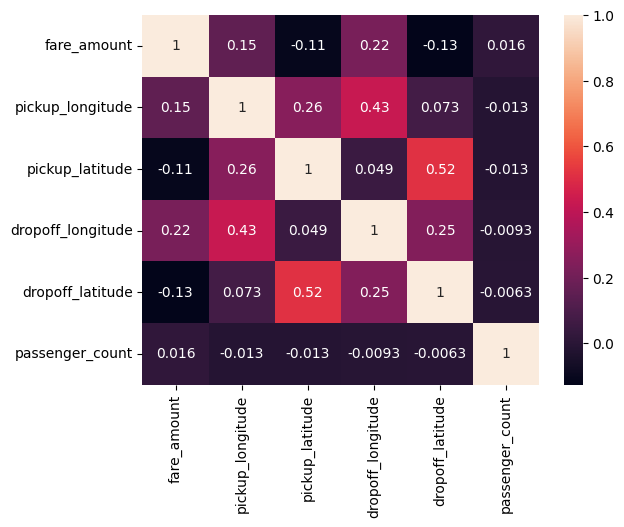

In [89]:
df = df.drop("pickup_datetime",axis=1)
sns.heatmap(df.corr(),annot=True)

In [90]:
x = df.drop("passenger_count",axis=1)
y = df["passenger_count"]

In [91]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [92]:
## Linear Regression
reg = LinearRegression()

In [93]:
reg.fit(x_train,y_train)

LinearRegression()

In [94]:
y_pred = reg.predict(x_test)

In [95]:
reg_RMSE = np.sqrt(metrics.mean_squared_error(y_test,y_pred))
reg_squared = r2_score(y_test,y_pred)

In [96]:
reg_RMSE

0.8728583477587258

In [97]:
reg_squared

0.0005456584094787331

In [98]:
## optional part if you wanna do then do or ignore
tp = pd.DataFrame({'model':'LinearRegression','RMSE':[reg_RMSE],'R-squared':[reg_squared]})

In [99]:
tp

,model,RMSE,R-squared
0,LinearRegression,0.872858,0.000546


In [106]:
## Ridge Regression

ridge = Ridge()

ridge.fit(x_train,y_train)
pred = ridge.predict(x_test)
ridge_RMSE = np.sqrt(metrics.mean_squared_error(y_test,pred))
ridge_squared = r2_score(y_test,pred)

In [107]:
## Lasso Regression

lasso = Lasso()

lasso.fit(x_train,y_train)
l_pred = ridge.predict(x_test)
lasso_RMSE = np.sqrt(metrics.mean_squared_error(y_test,l_pred))
lasso_squared = r2_score(y_test,l_pred)